# Metadata

```
Author: Linnaea Kavulich
Contact: qpk4kp@virginia.edu
Course: DS 5001 (Spring 2023)
```

<h1><center>The State of Natural Language Processing</center></h1>
<h3><center>An exploration of the infamous Locke-Hobbes-Rousseau Debate Using NLP techniques</center></h3>

*** 

<center>This notebook imports tables in F4 format to perform PCA.</center>

| Book_id | Title | Author |
| :- | :- | :- |
| 1 | The Social Contract | Jean-Jacques Rousseau 
| 2 | Leviathan | Thomas Hobbes
| 3 | Second Treatise of Government | John Locke
| 4 | Discourse on the Origin and Basis of Inequality Among Men | Jean-Jacques Rousseau
| 5 | An Essay Concerning Humane Understanding, Vol. 1 | John Locke
| 6 | An Essay Concerning Humane Understanding, Vol. 2 | John Locke

## Import Packages

In [1]:
import numpy as np
import pandas as pd

import os
os.chdir('C:/Users/linna/Box/MSDS/DS5001/Final Project/Corpus/')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import plotly_express as px

In [2]:
OHCO = ['book_id', 'chap_num', 'para_num']
PARA = OHCO[:3]
CHAP = OHCO[:2]
BOOK = OHCO[:1]

***

## Load CORPUS, convert to DOCS

In [3]:
CORPUS = pd.read_csv('CORPUS.csv')

In [4]:
CORPUS.head()

,book_id,chap_num,para_num,sent_num,token_num,token_str,term_str,pos
0,1,1,0,0,0,SUBJECT,subject,NN
1,1,1,0,0,1,OF,of,IN
2,1,1,0,0,2,THE,the,DT
3,1,1,0,0,3,FIRST,first,JJ
4,1,1,0,0,4,BOOK,book,NN


In [5]:
CORPUS['term_str'] = CORPUS['term_str'].astype(str)

In [6]:
CORPUS.dtypes

book_id       int64
chap_num      int64
para_num      int64
sent_num      int64
token_num     int64
token_str    object
term_str     object
pos          object
dtype: object

In [7]:
DOCS = CORPUS[CORPUS.pos.str.match(r'^NNS?$')]\
    .groupby(CHAP).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

In [8]:
DOCS

doc_str
book_id chap_num                                                   
1       1         subject book man chains master others slave ch...
        2         societies one family children father preservat...
        3         right strongest master strength right obedienc...
        4         slavery man authority force right conventions ...
        5         convention i friends despotism difference mult...
...                                                             ...
6       27        assent grounds probability grounds probability...
        28        significations word reason word reason languag...
        29        faith reason provinces boundaries necessity ig...
        31        assent error causes error men contrary probabi...
        32        division sciences science sorts compass nature...

[183 rows x 1 columns]

In [9]:
count_engine = CountVectorizer(max_features=4000, ngram_range=[1,2], stop_words='english')
count_model = count_engine.fit_transform(DOCS.doc_str)
TERMS = count_engine.get_feature_names_out()

In [10]:
VOCAB = pd.DataFrame(index=TERMS)
VOCAB.index.name = 'term_str'

In [11]:
DTM = pd.DataFrame(count_model.toarray(), index=DOCS.index, columns=TERMS)

In [12]:
VOCAB['doc_count'] = DTM.astype('bool').astype('int').sum()
DOCS['term_count'] = DTM.sum(1)

In [13]:
DOCS.term_count.describe()

count      183.000000
mean       772.032787
std       1082.676597
min         23.000000
25%        188.000000
50%        523.000000
75%       1020.000000
max      11182.000000
Name: term_count, dtype: float64

In [14]:
lda_engine = LDA(n_components=40, max_iter=20, learning_offset=50., random_state=0)

In [15]:
TNAMES = [f"T{str(x).zfill(len(str(40)))}" for x in range(40)]

In [16]:
lda_model = lda_engine.fit_transform(count_model)

In [17]:
THETA = pd.DataFrame(lda_model, index=DOCS.index)
THETA.columns.name = 'topic_id'
THETA.columns = TNAMES

In [18]:
THETA.sample(20).style.background_gradient(cmap='GnBu', axis=None)

In [19]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [20]:
PHI.T.sample(20).style.background_gradient(cmap='GnBu', axis=None)

topic_id,T00,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
state men,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,7.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,2.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
governour,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.182517,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,6.638566,0.025000,0.025000,0.025000,1.253917,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
fancy,0.025000,0.025000,0.025000,0.025000,0.025000,28.567871,0.025000,1.043577,3.051709,0.025000,0.025000,0.025000,0.025000,0.025000,1.272561,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,7.068499,5.767783,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,6.403000,0.025000
idolatry,0.025000,22.105351,0.025000,2.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,7.944649,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
right succession,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,15.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
lines,0.025000,1.297429,0.025000,4.445407,0.025000,0.025000,0.025000,1.081066,0.025000,0.436733,0.025000,2.465759,5.327211,0.025000,1.275085,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.251199,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,4.368573,0.025000,0.025000,6.712278,1.614262
mind things,0.025000,1.126207,0.025000,6.821733,0.025000,0.025000,4.838655,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.187170,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.055604,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,2.120631,0.025000
foreigners,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.324543,0.025000,12.725457,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
nation,0.025000,0.025000,0.025000,1.103161,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,15.395191,0.025000,0.025000,0.025000,0.025000,0.025000,2.818329,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,5.745638,0.025000,18.795093,0.025000,0.025000,14.181710,0.025000,0.025000,7.135877,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000


In [21]:
TOPICS = PHI.stack().to_frame('topic_weight').groupby('topic_id')\
    .apply(lambda x: x.sort_values('topic_weight', ascending=False)\
        .head(9).reset_index().drop('topic_id', axis=1)['term_str'])

In [22]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8
topic_id,,,,,,,,,
T00,aaron,pieces,person soveraign,persons,peru,peter,phantasme,phantasmes,philosopher
T01,power,men,worship,man,god,commonwealth,image,lawes,actions
T02,aaron,pieces,person soveraign,persons,peru,peter,phantasme,phantasmes,philosopher
T03,ideas,idea,mind,things,substances,power,minds,modes,parts
T04,words,ideas,names,use,signification,men,word,idea,things
T05,god,spirit,sense,men,place,word,words,spirits,vision
T06,ideas,relation,things,relations,idea,men,thing,man,actions
T07,law,man,nature,men,lawes,crime,commonwealth,law nature,reason
T08,property,land,use,labour,right,men,man,life,nature


In [23]:
TOPICS['label'] = TOPICS.apply(lambda x: x.name + ' ' + ', '.join(x[:9]), 1)

In [24]:
print(TOPICS.label.values)

['T00 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher'
 'T01 power, men, worship, man, god, commonwealth, image, lawes, actions'
 'T02 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher'
 'T03 ideas, idea, mind, things, substances, power, minds, modes, parts'
 'T04 words, ideas, names, use, signification, men, word, idea, things'
 'T05 god, spirit, sense, men, place, word, words, spirits, vision'
 'T06 ideas, relation, things, relations, idea, men, thing, man, actions'
 'T07 law, man, nature, men, lawes, crime, commonwealth, law nature, reason'
 'T08 property, land, use, labour, right, men, man, life, nature'
 'T09 duration, idea, ideas, space, time, motion, infinity, mind, succession'
 'T10 modes, ideas, names, mind, ideas names, actions, notice, men, modes ideas'
 'T11 men, man, state, nature, laws, society, life, time, people'
 'T12 body, space, idea, parts, motion, extension, bodies, place, substance'


In [25]:
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()

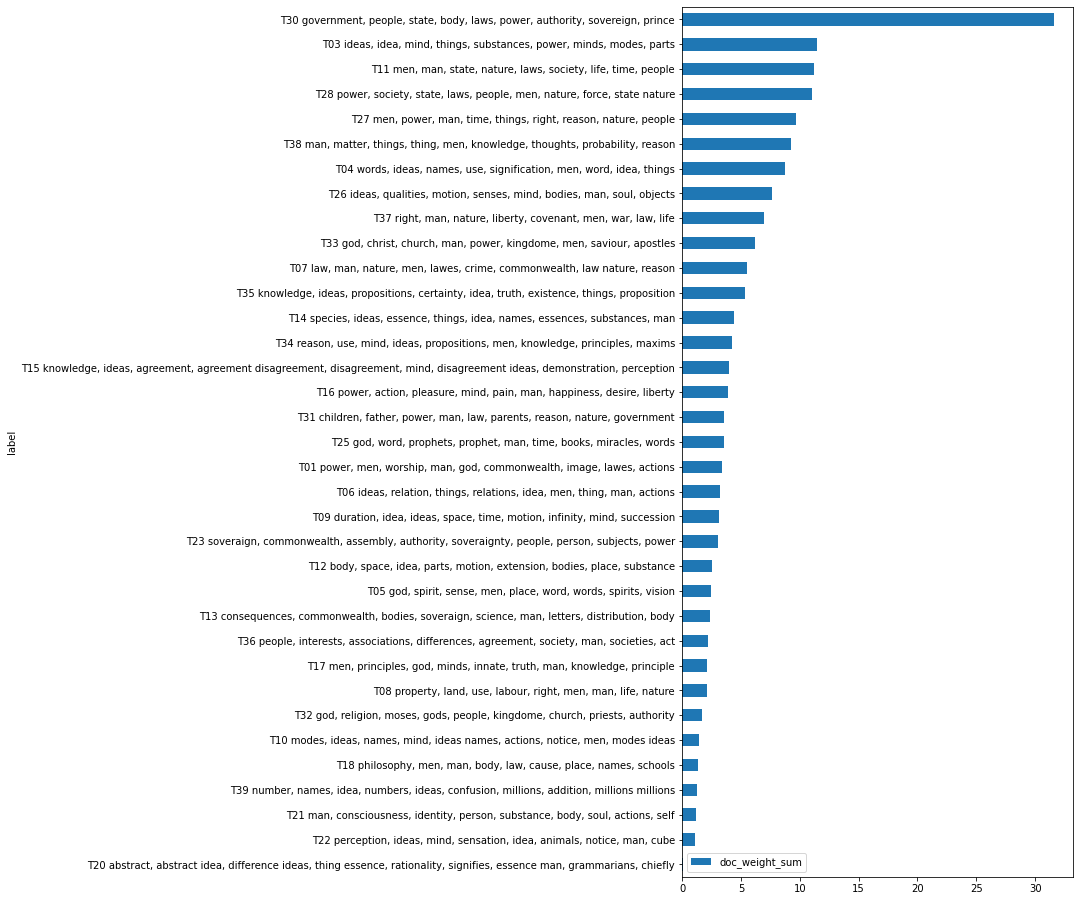

In [58]:
TOPICS.sort_values('doc_weight_sum', ascending=True).iloc[5:].plot.barh(y='doc_weight_sum', x='label', figsize=(7, 16));

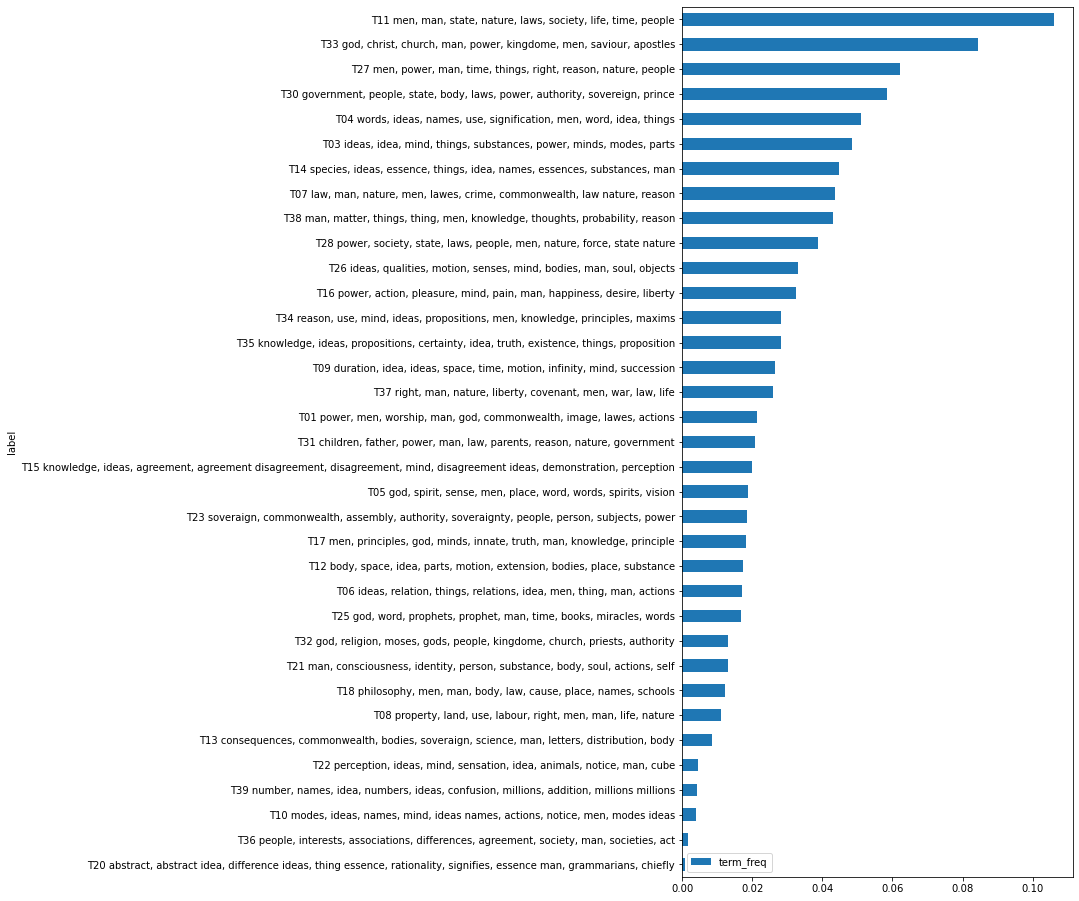

In [60]:
TOPICS.sort_values('term_freq', ascending=True).iloc[5:].plot.barh(y='term_freq', x='label', figsize=(7, 16));

## Now let's look at the differences between Hobbes, Locke and Rousseau

In [28]:
LIB = pd.read_csv('LIB.csv')

In [29]:
LIB = LIB.drop(columns='Unnamed: 0')

In [30]:
LIB

,book_id,source_file_path,chap_regex,title,author,book_len,n_chaps
0,1,social_contract_rousseau.txt,\s*(chapter)\s+(?=([IVX]+))(\s|$),The Social Contract,Jean-Jacques Rousseau,111749,48
1,2,hobbes_leviathan.txt,\s*CHAPTER\s+[IVXLCDM]+\.,Leviathan,Thomas Hobbes,224684,46
2,3,locke_second.txt,\s*CHAPTER+\.\s+[IVXLCDM]+\.,The Second Treatise of Government,John Locke,58125,19
3,4,rousseau_inequality.txt,\s*(DISCOURSE FIRST PART|SECOND PART)\s*,A Discourse Upon The Origin And The Foundation...,Jean-Jacques Rousseau,26001,2
4,5,humane_understanding_locke.txt,\s*CHAPTER+\s+[IVXLCDM]+\.,An Essay Concerning Humane Understanding,John Locke,150692,37
5,6,humane_understanding_vol2.txt,\s*CHAPTER+\s+[IVXLCDM]+\.,"An Essay Concerning Humane Understanding, Volu...",John Locke,130868,32


In [31]:
LIB['author_key'] = LIB.author.str.split(' ').str[1].str.lower()

In [32]:
LIB

,book_id,source_file_path,chap_regex,title,author,book_len,n_chaps,author_key
0,1,social_contract_rousseau.txt,\s*(chapter)\s+(?=([IVX]+))(\s|$),The Social Contract,Jean-Jacques Rousseau,111749,48,rousseau
1,2,hobbes_leviathan.txt,\s*CHAPTER\s+[IVXLCDM]+\.,Leviathan,Thomas Hobbes,224684,46,hobbes
2,3,locke_second.txt,\s*CHAPTER+\.\s+[IVXLCDM]+\.,The Second Treatise of Government,John Locke,58125,19,locke
3,4,rousseau_inequality.txt,\s*(DISCOURSE FIRST PART|SECOND PART)\s*,A Discourse Upon The Origin And The Foundation...,Jean-Jacques Rousseau,26001,2,rousseau
4,5,humane_understanding_locke.txt,\s*CHAPTER+\s+[IVXLCDM]+\.,An Essay Concerning Humane Understanding,John Locke,150692,37,locke
5,6,humane_understanding_vol2.txt,\s*CHAPTER+\s+[IVXLCDM]+\.,"An Essay Concerning Humane Understanding, Volu...",John Locke,130868,32,locke


In [33]:
AUTHORS = sorted(LIB.author_key.value_counts().index.to_list())

In [34]:
TOPICS[AUTHORS] = THETA.join(LIB, on='book_id').groupby('author_key')[TNAMES].mean().T

In [35]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,label,doc_weight_sum,term_freq,hobbes,locke,rousseau
topic_id,,,,,,,,,,,,,,,
T00,aaron,pieces,person soveraign,persons,peru,peter,phantasme,phantasmes,philosopher,"T00 aaron, pieces, person soveraign, persons, ...",0.018516,0.000688,0.000213,0.000057,0.000087
T01,power,men,worship,man,god,commonwealth,image,lawes,actions,"T01 power, men, worship, man, god, commonwealt...",3.357761,0.021446,0.000213,0.038731,0.000087
T02,aaron,pieces,person soveraign,persons,peru,peter,phantasme,phantasmes,philosopher,"T02 aaron, pieces, person soveraign, persons, ...",0.018516,0.000688,0.000213,0.000057,0.000087
T03,ideas,idea,mind,things,substances,power,minds,modes,parts,"T03 ideas, idea, mind, things, substances, pow...",11.432458,0.048360,0.001537,0.105662,0.000087
T04,words,ideas,names,use,signification,men,word,idea,things,"T04 words, ideas, names, use, signification, m...",8.726934,0.050943,0.000213,0.015066,0.002467
T05,god,spirit,sense,men,place,word,words,spirits,vision,"T05 god, spirit, sense, men, place, word, word...",2.464164,0.018739,0.003482,0.026983,0.000087
T06,ideas,relation,things,relations,idea,men,thing,man,actions,"T06 ideas, relation, things, relations, idea, ...",3.226677,0.017073,0.002381,0.026306,0.001203
T07,law,man,nature,men,lawes,crime,commonwealth,law nature,reason,"T07 law, man, nature, men, lawes, crime, commo...",5.498739,0.043569,0.019882,0.047236,0.027523
T08,property,land,use,labour,right,men,man,life,nature,"T08 property, land, use, labour, right, men, m...",2.077141,0.010981,0.015502,0.001588,0.062867


In [36]:
TOPICS[AUTHORS + ['label']].style.background_gradient(cmap='GnBu', axis=None)

term_str,hobbes,locke,rousseau,label
topic_id,,,,
T00,0.000213,0.000057,0.000087,"T00 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher"
T01,0.000213,0.038731,0.000087,"T01 power, men, worship, man, god, commonwealth, image, lawes, actions"
T02,0.000213,0.000057,0.000087,"T02 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher"
T03,0.001537,0.105662,0.000087,"T03 ideas, idea, mind, things, substances, power, minds, modes, parts"
T04,0.000213,0.015066,0.002467,"T04 words, ideas, names, use, signification, men, word, idea, things"
T05,0.003482,0.026983,0.000087,"T05 god, spirit, sense, men, place, word, words, spirits, vision"
T06,0.002381,0.026306,0.001203,"T06 ideas, relation, things, relations, idea, men, thing, man, actions"
T07,0.019882,0.047236,0.027523,"T07 law, man, nature, men, lawes, crime, commonwealth, law nature, reason"
T08,0.015502,0.001588,0.062867,"T08 property, land, use, labour, right, men, man, life, nature"


In [61]:
TOPICS[AUTHORS + ['label']].sort_values('hobbes', ascending=False).head(10).style.background_gradient(cmap='GnBu', axis=None)

term_str,hobbes,locke,rousseau,label
topic_id,,,,
T30,0.596143,0.008792,0.117924,"T30 government, people, state, body, laws, power, authority, sovereign, prince"
T11,0.182510,0.024716,0.005894,"T11 men, man, state, nature, laws, society, life, time, people"
T37,0.058281,0.035083,0.063087,"T37 right, man, nature, liberty, covenant, men, war, law, life"
T36,0.045359,0.000057,0.000716,"T36 people, interests, associations, differences, agreement, society, man, societies, act"
T07,0.019882,0.047236,0.027523,"T07 law, man, nature, men, lawes, crime, commonwealth, law nature, reason"
T28,0.017333,0.001131,0.532763,"T28 power, society, state, laws, people, men, nature, force, state nature"
T08,0.015502,0.001588,0.062867,"T08 property, land, use, labour, right, men, man, life, nature"
T31,0.011390,0.007433,0.124680,"T31 children, father, power, man, law, parents, reason, nature, government"
T25,0.010743,0.035539,0.000087,"T25 god, word, prophets, prophet, man, time, books, miracles, words"


In [62]:
TOPICS[AUTHORS + ['label']].sort_values('locke', ascending=False).head(10).style.background_gradient(cmap='GnBu', axis=None)

term_str,hobbes,locke,rousseau,label
topic_id,,,,
T03,0.001537,0.105662,0.000087,"T03 ideas, idea, mind, things, substances, power, minds, modes, parts"
T27,0.009129,0.105586,0.014797,"T27 men, power, man, time, things, right, reason, nature, people"
T26,0.001487,0.076891,0.000087,"T26 ideas, qualities, motion, senses, mind, bodies, man, soul, objects"
T33,0.000845,0.071779,0.000902,"T33 god, christ, church, man, power, kingdome, men, saviour, apostles"
T38,0.004280,0.059781,0.005841,"T38 man, matter, things, thing, men, knowledge, thoughts, probability, reason"
T07,0.019882,0.047236,0.027523,"T07 law, man, nature, men, lawes, crime, commonwealth, law nature, reason"
T01,0.000213,0.038731,0.000087,"T01 power, men, worship, man, god, commonwealth, image, lawes, actions"
T16,0.001427,0.038263,0.029490,"T16 power, action, pleasure, mind, pain, man, happiness, desire, liberty"
T09,0.001462,0.036024,0.000087,"T09 duration, idea, ideas, space, time, motion, infinity, mind, succession"


In [63]:
TOPICS[AUTHORS + ['label']].sort_values('rousseau', ascending=False).head(10).style.background_gradient(cmap='GnBu', axis=None)

term_str,hobbes,locke,rousseau,label
topic_id,,,,
T28,0.017333,0.001131,0.532763,"T28 power, society, state, laws, people, men, nature, force, state nature"
T31,0.011390,0.007433,0.124680,"T31 children, father, power, man, law, parents, reason, nature, government"
T30,0.596143,0.008792,0.117924,"T30 government, people, state, body, laws, power, authority, sovereign, prince"
T37,0.058281,0.035083,0.063087,"T37 right, man, nature, liberty, covenant, men, war, law, life"
T08,0.015502,0.001588,0.062867,"T08 property, land, use, labour, right, men, man, life, nature"
T16,0.001427,0.038263,0.029490,"T16 power, action, pleasure, mind, pain, man, happiness, desire, liberty"
T07,0.019882,0.047236,0.027523,"T07 law, man, nature, men, lawes, crime, commonwealth, law nature, reason"
T27,0.009129,0.105586,0.014797,"T27 men, power, man, time, things, right, reason, nature, people"
T11,0.182510,0.024716,0.005894,"T11 men, man, state, nature, laws, society, life, time, people"


In [40]:
TOPICS['author'] = TOPICS[AUTHORS].idxmax(1)

In [41]:
TOPICS.iloc[:, 9:].sort_values(['author','doc_weight_sum'], ascending=[True,False]).style.background_gradient(cmap='GnBu')

term_str,label,doc_weight_sum,term_freq,hobbes,locke,rousseau,author
topic_id,,,,,,,
T30,"T30 government, people, state, body, laws, power, authority, sovereign, prince",31.606534,0.058292,0.596143,0.008792,0.117924,hobbes
T11,"T11 men, man, state, nature, laws, society, life, time, people",11.208434,0.106076,0.182510,0.024716,0.005894,hobbes
T36,"T36 people, interests, associations, differences, agreement, society, man, societies, act",2.197485,0.001751,0.045359,0.000057,0.000716,hobbes
T20,"T20 abstract, abstract idea, difference ideas, thing essence, rationality, signifies, essence man, grammarians, chiefly",0.102190,0.000799,0.000213,0.000057,0.000087,hobbes
T00,"T00 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher",0.018516,0.000688,0.000213,0.000057,0.000087,hobbes
T02,"T02 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher",0.018516,0.000688,0.000213,0.000057,0.000087,hobbes
T19,"T19 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher",0.018516,0.000688,0.000213,0.000057,0.000087,hobbes
T24,"T24 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher",0.018516,0.000688,0.000213,0.000057,0.000087,hobbes
T29,"T29 aaron, pieces, person soveraign, persons, peru, peter, phantasme, phantasmes, philosopher",0.018516,0.000688,0.000213,0.000057,0.000087,hobbes


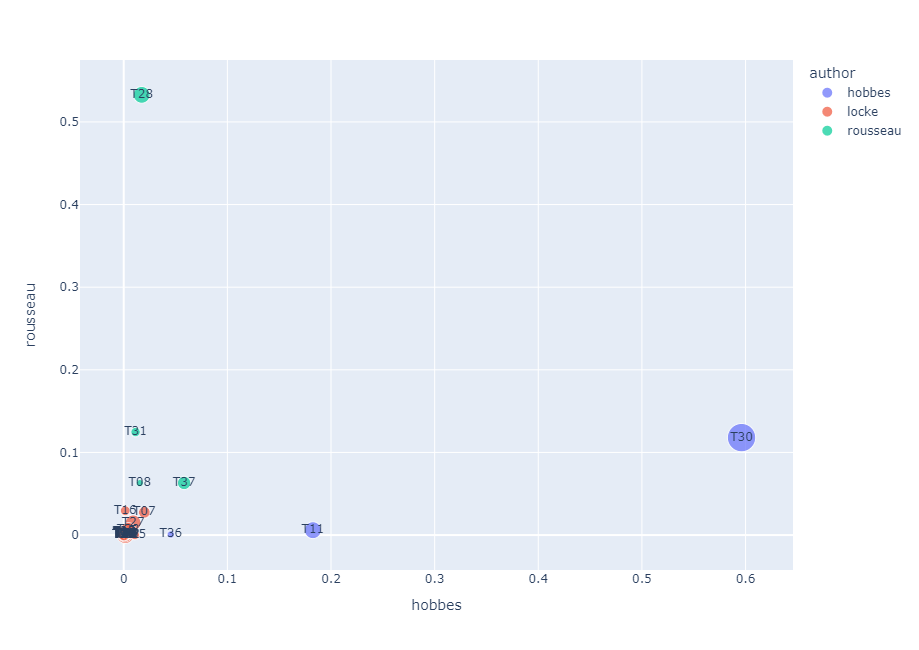

In [48]:
px.scatter(TOPICS.reset_index(), 'hobbes', 'rousseau', 
           hover_name='label', text='topic_id', 
           size=(TOPICS.doc_weight_sum),
           color='author',
           width=1000, height=650)

In [43]:
px.scatter(TOPICS.reset_index(), 'hobbes', 'locke', 
           hover_name='label', text='topic_id', 
           size=(TOPICS.hobbes * TOPICS.locke),
           color='author',
           width=1000, height=650)

In [44]:
px.scatter(TOPICS.reset_index(), 'rousseau', 'locke', 
           hover_name='label', text='topic_id', 
           size=(TOPICS.rousseau * TOPICS.locke),
           color='author',
           width=1000, height=650)

## Save tables

In [45]:
os.chdir('C:/Users/linna/Box/MSDS/DS5001/Final Project/Corpus/')

In [46]:
#DOCS.to_csv('LDA_DOCS-chaps.csv')
#TOPICS.to_csv('LDA_TOPICS-9.csv')
#THETA.to_csv('LDA_THETA-9.csv')
#PHI.to_csv('LDA_PHI-9.csv')